# Main Modelling Notebook

David Modjeska and Andrew Greene

This notebook contains the actual models that we are using for this project.

In [1]:
# Begin with all the necessary imports

import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import re
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

The loading (which also handles filtering, standardizing, one-hot-encoding, etc.) occurs in a separate module for clarity's sake. Please see `Data_Loading.ipynb`, which is used to automatically generate `data_loading.py`

In [2]:
# load data
%run -i data_loading.py

248445
113036


C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Indexes computed

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Training set has 28182 rows)

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Test set has 84854 rows)
address_state objec

#### Set up Modelling Framework

Again, the framework is defined in an external module so it can be reused in various notebooks. Please see `Modelling_Framework.ipynb` from which `modelling_framework.py` is generated.

In [3]:
# set up modelling framework
% run -i modelling_framework.py

#### Sanity-checking the data

A reminder that initial data exploration occurs in the `amg_explore.ipynb` notebook. Here we are summarizing the properties of the data that have been loaded to establish benchmarks for our report.

In [4]:
# What is our sample size broken out by outcome?
y.value_counts()

True     23897
False     4285
Name: loan_status, dtype: int64

In [5]:
# As a result, what is our frequency of outcome?
y.mean()

0.84795259385423316

### Models without PCA

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


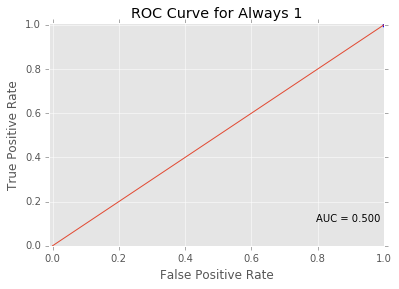

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


DummyClassifier(constant=1, random_state=None, strategy='constant')

In [8]:
# Simplest possible model: always assume the majority outcome. 
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=1), model_name='Always 1')

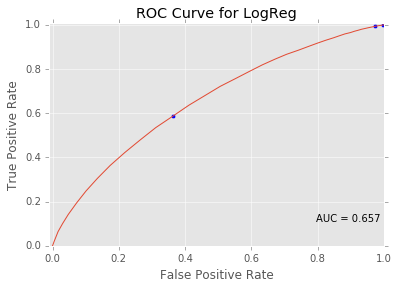

all   score: 0.848  baseline: 0.848   prec: 0.556   f1: 0.918  | test score 0.848  prec 0.564 f1 0.002  GP -913MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.600
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.800
2013  score: 0.822  baseline: 0.822   prec: 0.454   f1: 0.902  | test score 0.823  prec 0.585


In [9]:
# Simplest approach is a naive Logistic Regression model
_ = eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

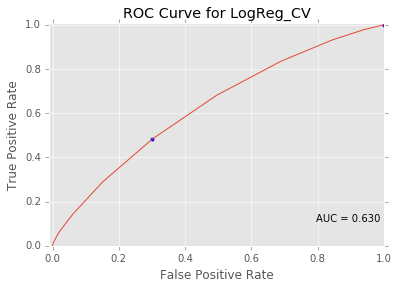

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec 0.550
C= 0.0001


dti                                    -0.056826
revol_util                             -0.055701
annual_income                           0.047845
inquiry_6_mos                          -0.045184
cpi                                    -0.041426
gdp                                    -0.039468
rir                                    -0.029272
total_accounts                          0.028092
home_owner__MORTGAGE                    0.024625
home_owner__RENT                       -0.022464
months_since_earliest_credit            0.020701
delinq_2_yrs                           -0.016794
loan_purpose__credit_card               0.012470
open_accounts                          -0.011015
desc_len                                0.010777
employ_length__n/a                     -0.009203
employ_length__10                       0.008915
verif_status__Verified                 -0.007593
loan_amount                             0.007152
loan_purpose__other                    -0.006163
verif_status__Not_Ve

In [10]:
# But a more appropriate one uses cross-validation
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(), model_name='LogReg_CV')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

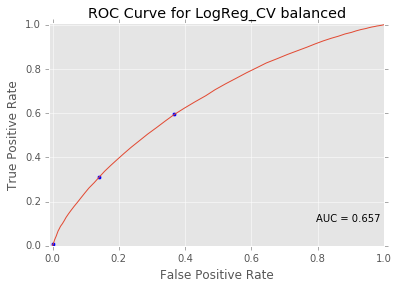

all   score: 0.607  baseline: 0.848   prec: 0.781   f1: 0.723  | test score 0.600  prec 0.782 f1 0.534  GP 13MM
2011  score: 0.624  baseline: 0.896   prec: 0.851   f1: 0.751  | test score 0.625  prec 0.845
2012  score: 0.596  baseline: 0.866   prec: 0.814   f1: 0.719  | test score 0.592  prec 0.823
2013  score: 0.619  baseline: 0.822   prec: 0.738   f1: 0.727  | test score 0.610  prec 0.749
C= 0.00599484250319


annual_income                           0.459223
loan_purpose__small_business           -0.343971
loan_purpose__credit_card               0.339828
employ_length__n/a                     -0.261436
revol_util                             -0.258278
emp_cleaned__                          -0.249169
inquiry_6_mos                          -0.197481
employ_length__1                        0.177445
cpi                                    -0.172602
loan_purpose__other                    -0.166542
loan_purpose__debt_consolidation        0.161694
address_state__CO                       0.152645
address_state__FL                      -0.149291
open_accounts                          -0.148040
home_owner__MORTGAGE                    0.144057
total_accounts                          0.142046
home_owner__RENT                       -0.131421
loan_purpose__major_purchase            0.128225
loan_purpose__moving                   -0.127842
dti                                    -0.125102
address_state__MA   

In [6]:
# But an even more appropriate one is (a) use cross-validation, and (b) use balanced weights
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(class_weight='balanced'), model_name='LogReg_CV balanced')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

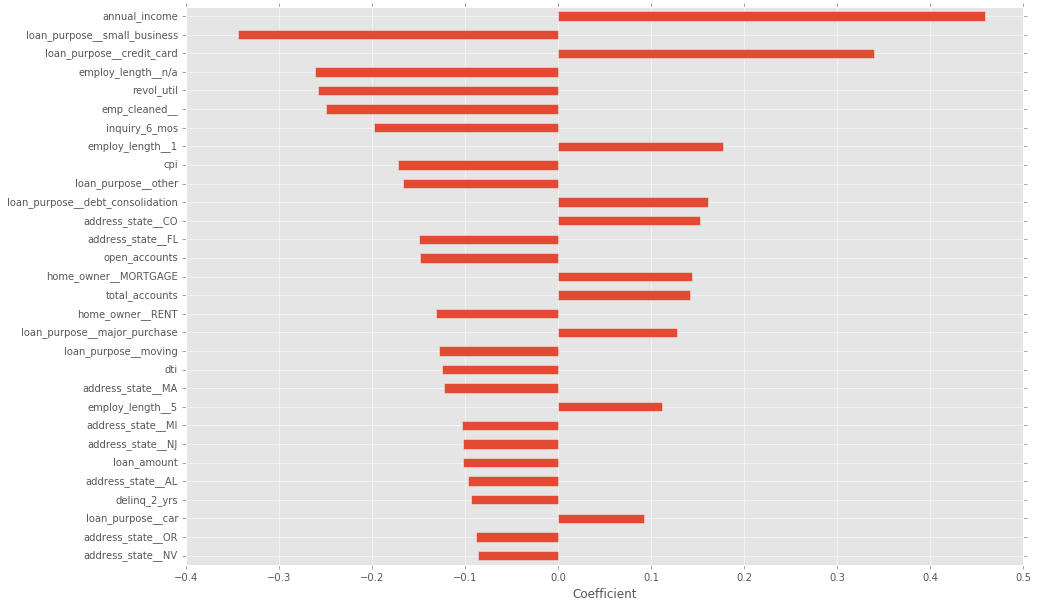

In [7]:
plt.figure(figsize=(15,10))
lr_coeff.sort_values('abs', ascending=False).coeff[0:30][::-1].plot(kind='barh')
plt.xlabel('Coefficient')
plt.show()

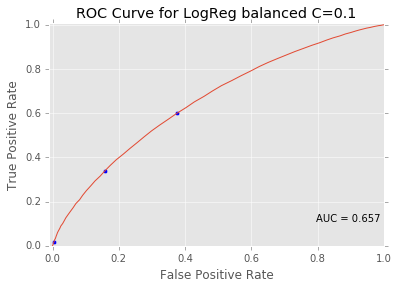

all   score: 0.605  baseline: 0.848   prec: 0.781   f1: 0.721  | test score 0.603  prec 0.782 f1 0.530  GP 5MM


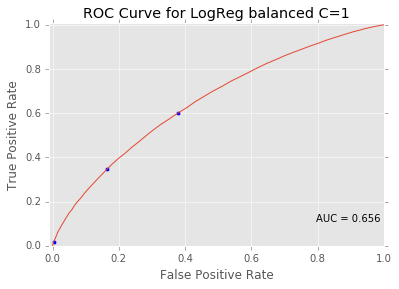

all   score: 0.607  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.604  prec 0.782 f1 0.529  GP 3MM


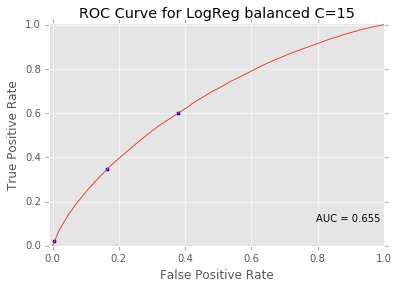

all   score: 0.607  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.603  prec 0.782 f1 0.529  GP 3MM


In [13]:
for C in (0.1, 1, 15):
    eval_model_all_years(lambda: Log_Reg(class_weight='balanced', C=C), model_name='LogReg balanced C='+str(C))

Let's examine cross-terms

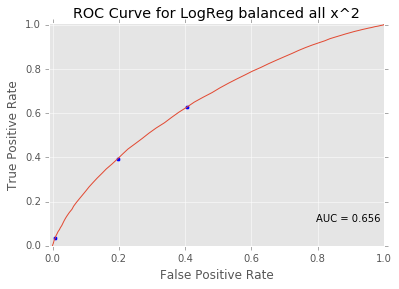

all   score: 0.627  baseline: 0.848   prec: 0.788   f1: 0.745  | test score 0.623  prec 0.778 f1 0.504  GP -65MM


In [14]:
lr_xterms = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                 poly_degree = 2,
                                 # columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'address_state'],
                                 model_name='LogReg balanced all x^2')

In [ ]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(lr_xterms.coef_.T, index=cross_term_names(x_expanded, 2))
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
plt.figure(figsize=(15,15))
lr_coeff.sort_values('abs', ascending=False).coeff[0:40][::-1].plot(kind='barh')
plt.xlabel('Coefficient')
plt.show()

In [ ]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^2')

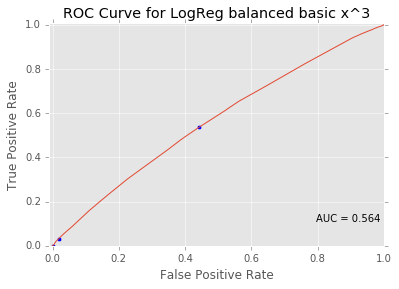

all   score: 0.535  baseline: 0.848   prec: 0.824   f1: 0.659  | test score 0.539  prec 0.823 f1 0.593  GP 31MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 3,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^3')

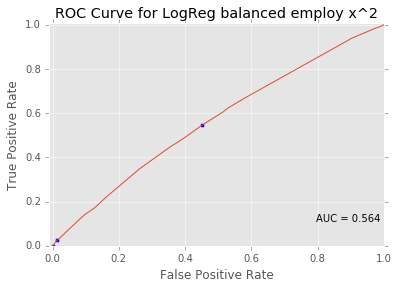

all   score: 0.545  baseline: 0.848   prec: 0.824   f1: 0.670  | test score 0.546  prec 0.822 f1 0.586  GP 45MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'employ_title'],
                     model_name='LogReg balanced employ x^2')

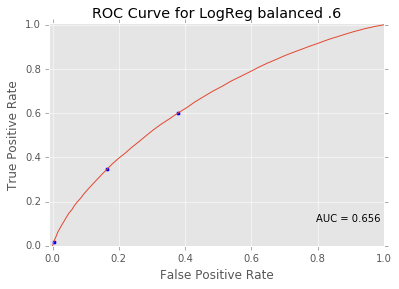

all   score: 0.607  baseline: 0.848   prec: 0.727   f1: 0.723  | test score 0.604  prec 0.734 f1 0.281  GP -493MM
2011  score: 0.628  baseline: 0.896   prec: 0.838   f1: 0.754  | test score 0.624  prec 0.816
2012  score: 0.595  baseline: 0.866   prec: 0.781   f1: 0.718  | test score 0.593  prec 0.802
2013  score: 0.617  baseline: 0.822   prec: 0.690   f1: 0.725  | test score 0.610  prec 0.702


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [19]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


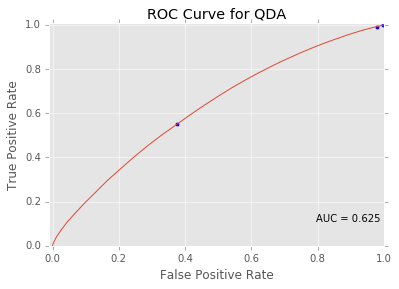

all   score: 0.848  baseline: 0.848   prec: 0.756   f1: 0.917  | test score 0.848  prec 0.747 f1 0.002  GP -913MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.820  baseline: 0.822   prec: 0.666   f1: 0.901  | test score 0.822  prec 0.703


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [20]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

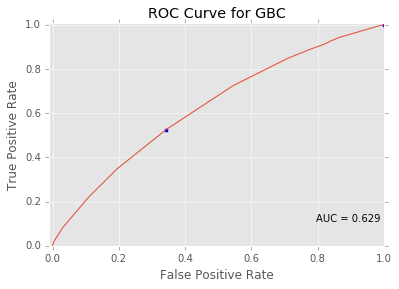

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.892  prec 0.867
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

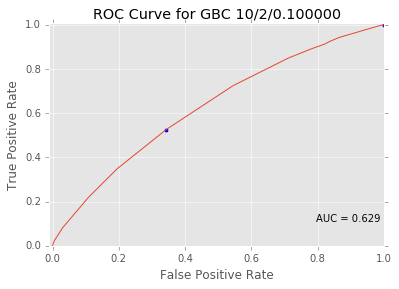

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


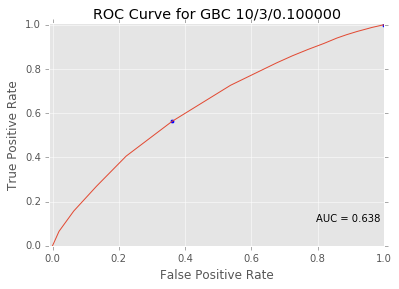

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


In [ ]:
for learning_rate in (0.1, 0.01):
    for n_est in (10, 50, 100, 200, 500):
        for max_depth in range(2, 10):
            eval_model_all_years(lambda: GBC(n_estimators = n_est, max_depth = max_depth, learning_rate = learning_rate),
                                 model_name='GBC %d/%d/%f' % (n_est, max_depth, learning_rate,))

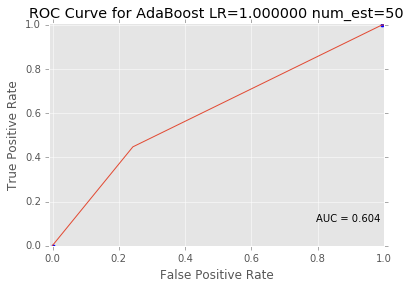

all   score: 0.847  baseline: 0.848   prec: 0.620   f1: 0.917  | test score 0.848  prec 0.539 f1 0.003  GP -912MM


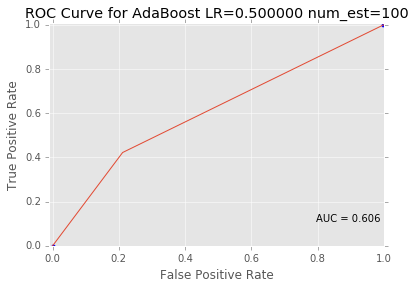

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec 0.600 f1 0.001  GP -914MM


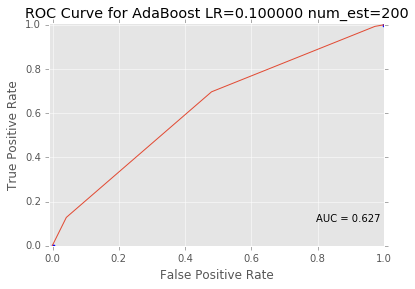

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


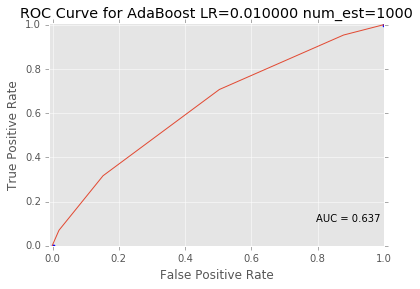

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


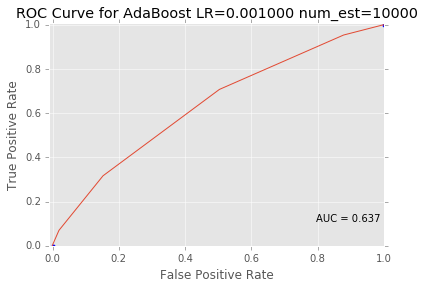

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


In [22]:
from sklearn.ensemble import AdaBoostClassifier
for num_est, l_rate in ((50, 1.0), (100, 0.5), (200, 0.1), (1000, 0.01), (10000, 0.001)):
    eval_model_all_years(lambda: AdaBoostClassifier(random_state=1729, n_estimators=num_est, learning_rate = l_rate),
                        model_name = 'AdaBoost LR=%f num_est=%d' % (l_rate, num_est,))

In [23]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
LogReg balanced basic x^3,0.564158,0.847953,0.659433,0.823989,0.535093,0.593443,0.822941,31.757548,0.539385
LogReg balanced basic x^2,0.563749,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
LogReg balanced employ x^2,0.563749,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
LogReg balanced C=15,0.655082,0.847953,0.722553,0.780111,0.606770,0.529294,0.782489,3.427875,0.603401
LogReg balanced C=1,0.655582,0.847953,0.722665,0.780103,0.606877,0.528969,0.782289,3.064922,0.603708
LogReg_CV balanced,0.656792,0.847953,0.722571,0.780541,0.606664,0.533929,0.781949,13.870466,0.600361
LogReg balanced C=0.1,0.656841,0.847953,0.720568,0.781220,0.604570,0.529524,0.781844,5.728478,0.603495
LogReg balanced all x^2,0.655560,0.847953,0.744838,0.787603,0.626641,0.503800,0.777974,-65.843792,0.622516
QDA,0.625398,0.847953,0.917445,0.755714,0.847527,0.001804,0.747126,-913.708314,0.847845
LogReg balanced .6,0.655582,0.847953,0.722665,0.726520,0.606877,0.281045,0.733955,-493.305109,0.603708


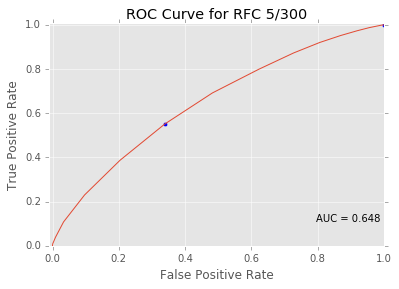

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [24]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

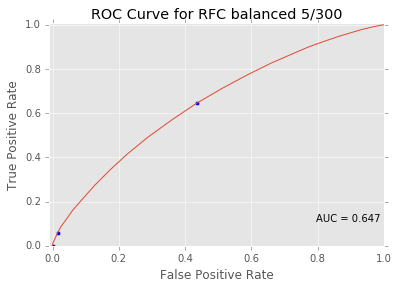

all   score: 0.633  baseline: 0.848   prec: 0.782   f1: 0.750  | test score 0.633  prec 0.778 f1 0.487  GP -168MM
2011  score: 0.744  baseline: 0.896   prec: 0.841   f1: 0.847  | test score 0.748  prec 0.825
2012  score: 0.639  baseline: 0.866   prec: 0.815   f1: 0.761  | test score 0.638  prec 0.819
2013  score: 0.643  baseline: 0.822   prec: 0.740   f1: 0.753  | test score 0.648  prec 0.739


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [25]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

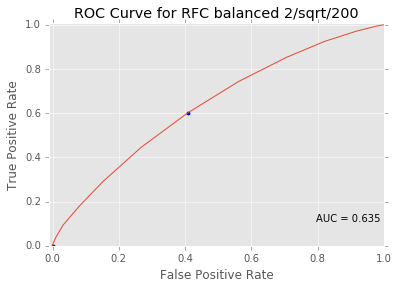

all   score: 0.600  baseline: 0.848   prec: 0.790   f1: 0.718  | test score 0.600  prec 0.790 f1 0.530  GP -50MM


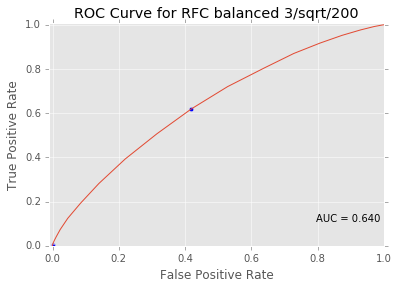

all   score: 0.615  baseline: 0.848   prec: 0.787   f1: 0.733  | test score 0.614  prec 0.786 f1 0.513  GP -99MM


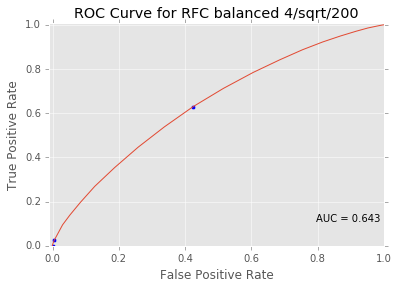

all   score: 0.620  baseline: 0.848   prec: 0.786   f1: 0.738  | test score 0.622  prec 0.782 f1 0.503  GP -128MM


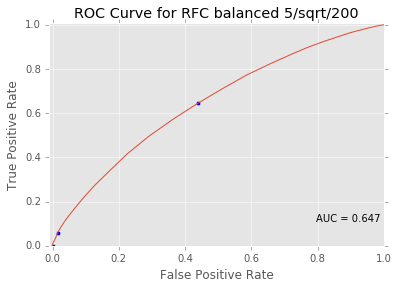

all   score: 0.632  baseline: 0.848   prec: 0.782   f1: 0.749  | test score 0.633  prec 0.779 f1 0.487  GP -163MM


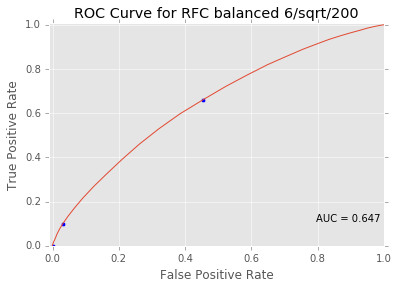

all   score: 0.645  baseline: 0.848   prec: 0.778   f1: 0.761  | test score 0.644  prec 0.776 f1 0.471  GP -198MM


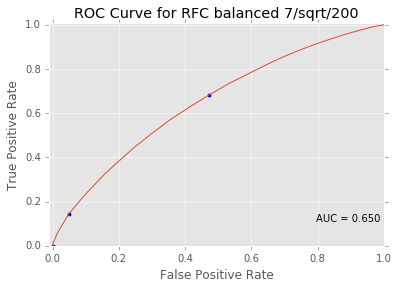

all   score: 0.661  baseline: 0.848   prec: 0.773   f1: 0.775  | test score 0.659  prec 0.771 f1 0.450  GP -240MM


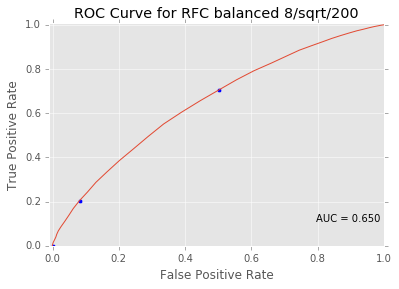

all   score: 0.677  baseline: 0.848   prec: 0.769   f1: 0.789  | test score 0.674  prec 0.768 f1 0.425  GP -297MM


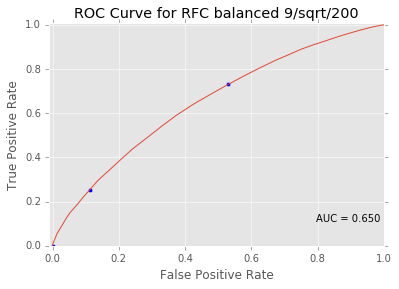

all   score: 0.698  baseline: 0.848   prec: 0.760   f1: 0.806  | test score 0.691  prec 0.762 f1 0.399  GP -345MM


In [26]:
for max_depth in range(2, 10):
  for max_features in ['sqrt']: # + list(np.arange(0.1, 0.91, 0.5)):
    for class_weight in ('balanced',): # None
      eval_model_all_years(lambda: RFC(random_state=1729, 
                                     max_depth=max_depth, 
                                     max_features=max_features,
                                     class_weight = class_weight,
                                     n_estimators=200),
                         model_name='RFC ' + (class_weight or 'unbalanced') + 
                                 ' ' + str(max_depth) + '/' + str(max_features) + '/200')  # TODO: other hyperparams

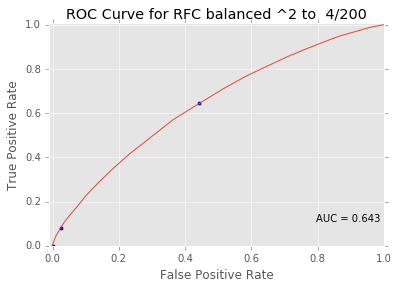

all   score: 0.634  baseline: 0.848   prec: 0.781   f1: 0.750  | test score 0.631  prec 0.781 f1 0.489  GP -170MM


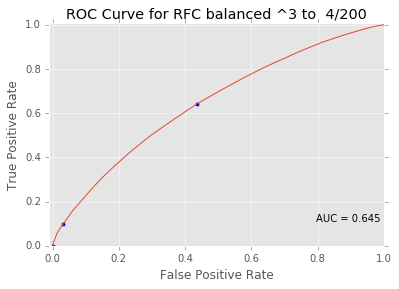

all   score: 0.631  baseline: 0.848   prec: 0.782   f1: 0.748  | test score 0.630  prec 0.780 f1 0.491  GP -177MM


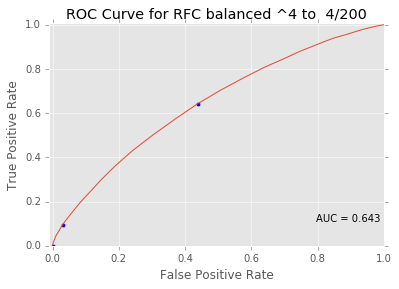

all   score: 0.629  baseline: 0.848   prec: 0.783   f1: 0.746  | test score 0.631  prec 0.780 f1 0.490  GP -183MM


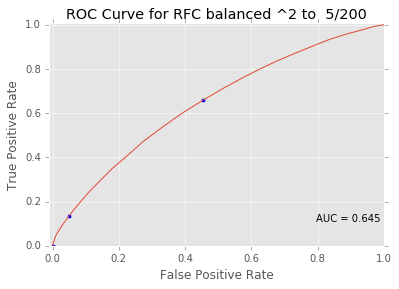

all   score: 0.646  baseline: 0.848   prec: 0.779   f1: 0.762  | test score 0.642  prec 0.777 f1 0.473  GP -206MM


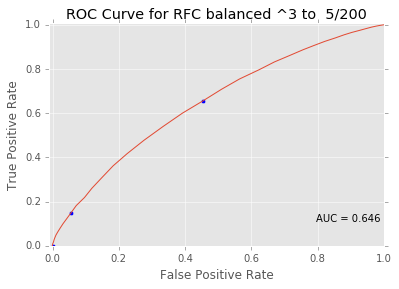

all   score: 0.642  baseline: 0.848   prec: 0.779   f1: 0.758  | test score 0.639  prec 0.779 f1 0.477  GP -203MM


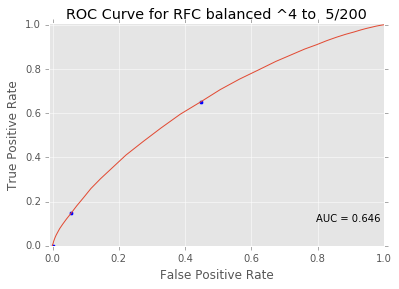

all   score: 0.642  baseline: 0.848   prec: 0.779   f1: 0.758  | test score 0.638  prec 0.779 f1 0.480  GP -205MM


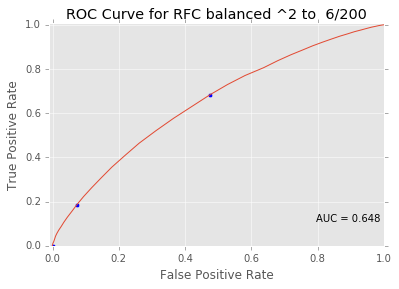

all   score: 0.663  baseline: 0.848   prec: 0.773   f1: 0.777  | test score 0.659  prec 0.771 f1 0.449  GP -256MM


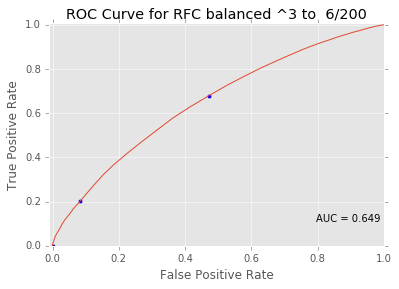

all   score: 0.658  baseline: 0.848   prec: 0.774   f1: 0.772  | test score 0.656  prec 0.773 f1 0.453  GP -252MM


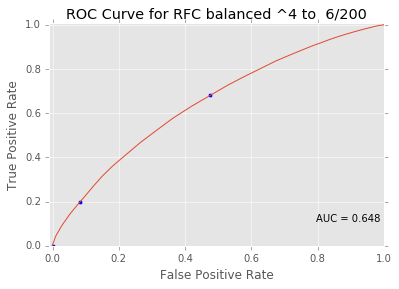

all   score: 0.658  baseline: 0.848   prec: 0.775   f1: 0.772  | test score 0.657  prec 0.773 f1 0.451  GP -255MM


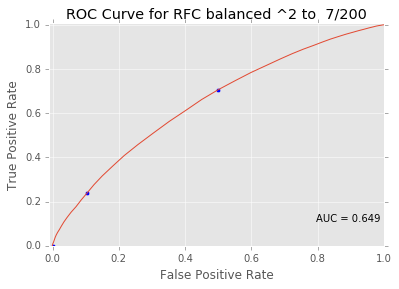

all   score: 0.679  baseline: 0.848   prec: 0.768   f1: 0.791  | test score 0.675  prec 0.767 f1 0.425  GP -304MM


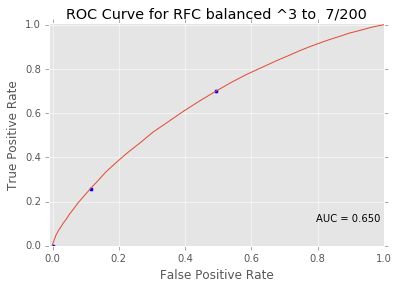

all   score: 0.677  baseline: 0.848   prec: 0.768   f1: 0.789  | test score 0.671  prec 0.768 f1 0.430  GP -292MM


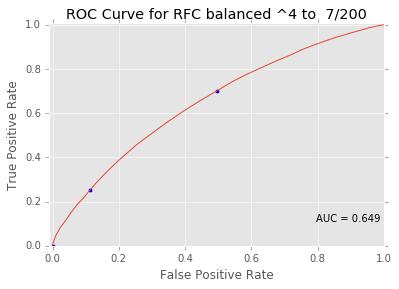

all   score: 0.677  baseline: 0.848   prec: 0.769   f1: 0.789  | test score 0.671  prec 0.768 f1 0.431  GP -287MM


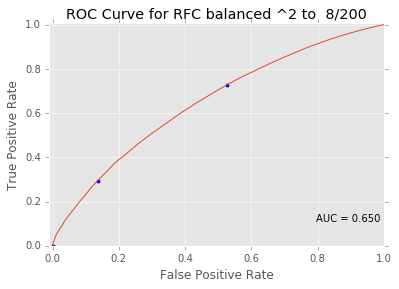

all   score: 0.698  baseline: 0.848   prec: 0.763   f1: 0.807  | test score 0.690  prec 0.762 f1 0.401  GP -346MM


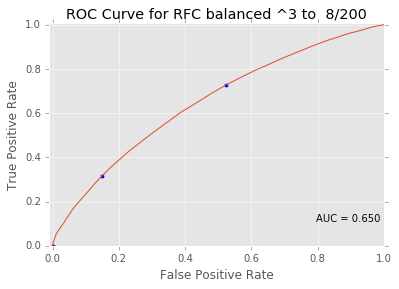

all   score: 0.696  baseline: 0.848   prec: 0.763   f1: 0.805  | test score 0.689  prec 0.762 f1 0.402  GP -343MM


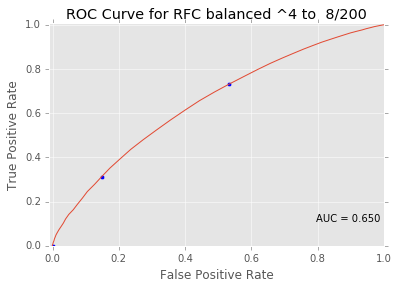

all   score: 0.697  baseline: 0.848   prec: 0.763   f1: 0.806  | test score 0.692  prec 0.762 f1 0.396  GP -354MM


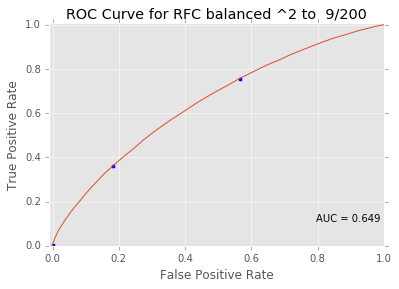

all   score: 0.719  baseline: 0.848   prec: 0.754   f1: 0.824  | test score 0.708  prec 0.757 f1 0.368  GP -402MM


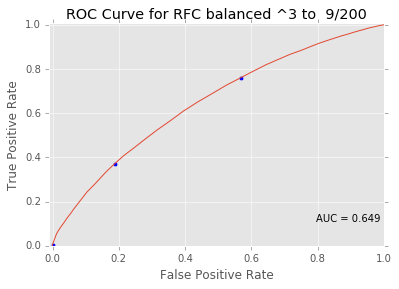

all   score: 0.718  baseline: 0.848   prec: 0.755   f1: 0.823  | test score 0.711  prec 0.756 f1 0.364  GP -413MM


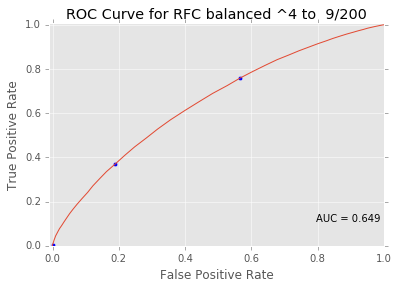

all   score: 0.718  baseline: 0.848   prec: 0.756   f1: 0.823  | test score 0.710  prec 0.756 f1 0.365  GP -411MM


In [27]:
for max_depth in range(4, 10):
    for poly_degree in range(2, 5):
        eval_model_all_years(lambda: RFC(random_state=1729, 
                                     max_depth=max_depth, 
                                     class_weight = 'balanced',
                                     n_estimators=200),
                             x = cross_terms(x_expanded, poly_degree),
                             x_test = cross_terms(x_test_expanded, poly_degree),
                             model_name='RFC balanced ^' + str(poly_degree) + " to " 
                                 ' ' + str(max_depth) + '/200')

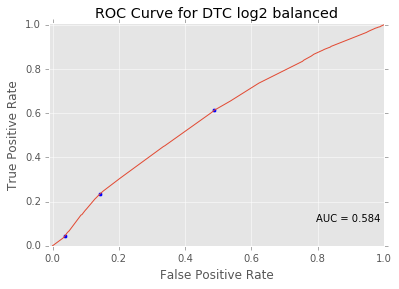

all   score: 0.585  baseline: 0.848   prec: 0.813   f1: 0.709  | test score 0.598  prec 0.808 f1 0.523  GP -69MM
2011  score: 0.514  baseline: 0.896   prec: 0.886   f1: 0.644  | test score 0.531  prec 0.873
2012  score: 0.524  baseline: 0.866   prec: 0.855   f1: 0.653  | test score 0.479  prec 0.852
2013  score: 0.564  baseline: 0.822   prec: 0.788   f1: 0.677  | test score 0.580  prec 0.781


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

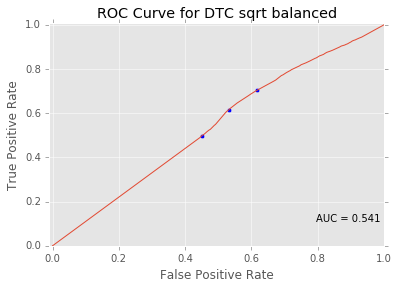

all   score: 0.630  baseline: 0.848   prec: 0.816   f1: 0.753  | test score 0.655  prec 0.812 f1 0.434  GP -277MM
2011  score: 0.760  baseline: 0.896   prec: 0.893   f1: 0.860  | test score 0.750  prec 0.877
2012  score: 0.651  baseline: 0.866   prec: 0.837   f1: 0.774  | test score 0.658  prec 0.842
2013  score: 0.629  baseline: 0.822   prec: 0.791   f1: 0.750  | test score 0.641  prec 0.784


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

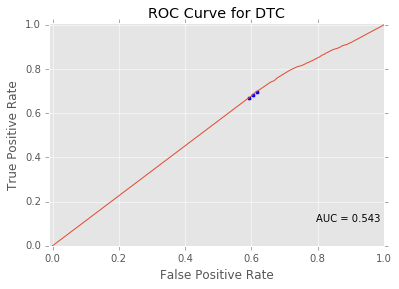

all   score: 0.674  baseline: 0.848   prec: 0.813   f1: 0.792  | test score 0.650  prec 0.815 f1 0.441  GP -276MM
2011  score: 0.810  baseline: 0.896   prec: 0.858   f1: 0.893  | test score 0.792  prec 0.857
2012  score: 0.692  baseline: 0.866   prec: 0.840   f1: 0.809  | test score 0.718  prec 0.849
2013  score: 0.666  baseline: 0.822   prec: 0.789   f1: 0.785  | test score 0.663  prec 0.788


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=20, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

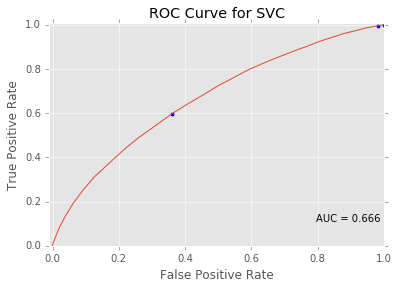

all   score: 0.608  baseline: 0.848   prec: 0.317   f1: 0.724  | test score 0.609  prec 0.564 f1 0.001  GP -915MM


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# This takes a very long time but is the winner
eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

0.01 2016-12-13 00:14:34.084000


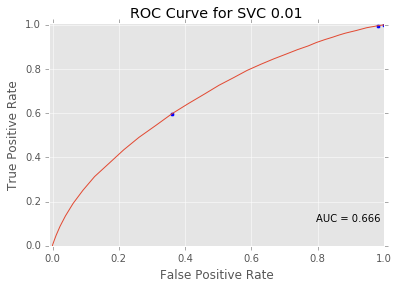

all   score: 0.608  baseline: 0.848   prec: 0.317   f1: 0.724  | test score 0.609  prec 0.564 f1 0.001  GP -915MM
0.0316227766017 2016-12-13 02:16:20.575000


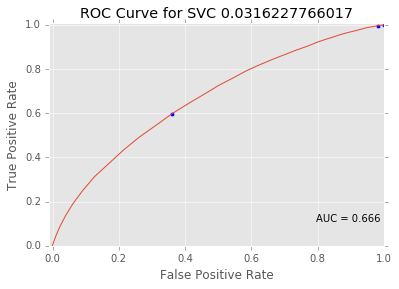

all   score: 0.608  baseline: 0.848   prec: 0.317   f1: 0.724  | test score 0.609  prec 0.564 f1 0.001  GP -915MM
0.1 2016-12-13 04:18:36.120000


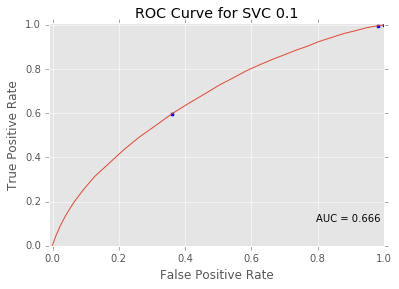

all   score: 0.608  baseline: 0.848   prec: 0.317   f1: 0.724  | test score 0.609  prec 0.564 f1 0.001  GP -915MM
0.316227766017 2016-12-13 06:20:01.593000


KeyboardInterrupt: 

In [ ]:
# This takes a very long time but is the winner
# Let's add in some different values for the hyperparam
for C in 10 ** np.arange(-2.0, 2.0, 0.5):
    print C, datetime.datetime.now()
    eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True),
                        model_name="SVC " + str(C))
print "done", datetime.datetime.now()

In [ ]:
# This takes a very long time but is the winner
# Let's add in some different values for the hyperparam
for C in (100, ):
    print C, datetime.datetime.now()
    eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True),
                        model_name="SVC " + str(C))
print "done", datetime.datetime.now()

100 2016-12-13 07:06:54.777000


#### Other Models without PCA

In [12]:
# TODO: Try again, this time fitting a regression against the payments received

In [13]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

y=2011   n=3561   d=3190   p: 0.896 | 0.896 | 0.896
y=2012   n=10764   d=9318   p: 0.866 | 0.866 | 0.866
y=2013   n=13857   d=11389   p: 0.822 | 0.822 | 0.822


In [14]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

0.847952593854
0.761029411765


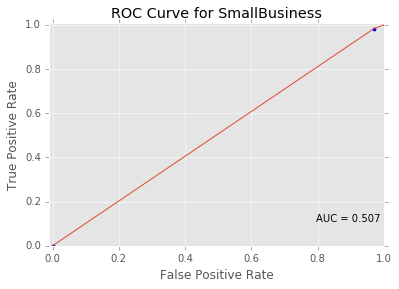

all   score: 0.838  baseline: 0.848   prec: 0.763   f1: 0.911  | test score 0.838  prec 0.761 f1 0.034  GP -869MM
2011  score: 0.872  baseline: 0.896   prec: 0.810   f1: 0.931  | test score 0.872  prec 0.797
2012  score: 0.853  baseline: 0.866   prec: 0.790   f1: 0.920  | test score 0.850  prec 0.794
2013  score: 0.817  baseline: 0.822   prec: 0.671   f1: 0.899  | test score 0.821  prec 0.662


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [15]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [16]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [17]:
lr_coeff.sort_values('abs', ascending=False).coeff

emp_cleaned__policeofficer         1.465591
emp_cleaned__executiveassistant    1.239194
emp_cleaned__engineer              1.153281
emp_cleaned__technician           -0.891116
home_owner__RENT                  -0.876660
emp_cleaned__mechanic             -0.832101
cpi                               -0.789798
home_owner__OWN                   -0.787872
emp_cleaned__sales                -0.783798
emp_cleaned__salesmanager          0.732785
address_state__WY                  0.658741
address_state__AK                  0.642899
loan_purpose__small_business      -0.632992
loan_purpose__renewable_energy    -0.613079
emp_cleaned__officemanager        -0.607935
emp_cleaned__driver               -0.602417
home_owner__MORTGAGE              -0.596941
emp_cleaned__storemanager         -0.584321
emp_cleaned__projectmanager       -0.570750
gdp                                0.534093
loan_purpose__credit_card          0.530991
annual_income                      0.528770
emp_cleaned__branchmanager      

In [18]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

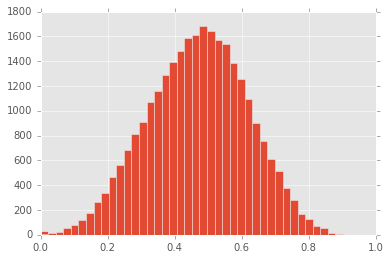

In [19]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [20]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

0.00    0.021739
0.05    0.027778
0.10    0.052239
0.15    0.047847
0.20    0.044627
0.25    0.064236
0.30    0.071335
0.35    0.095338
0.40    0.110419
0.45    0.140787
0.50    0.165917
0.55    0.192862
0.60    0.247445
0.65    0.281230
0.70    0.314168
0.75    0.348449
0.80    0.494253
0.85    0.454545
0.90    0.500000
Name: loan_status, dtype: float64

In [21]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [22]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [23]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

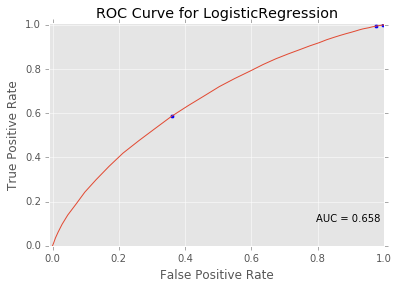

all   score: 0.848  baseline: 0.848   prec: 0.542   f1: 0.918  | test score 0.848  prec 0.495 f1 0.001  GP -913MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.600
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.700
2013  score: 0.822  baseline: 0.822   prec: 0.488   f1: 0.902  | test score 0.823  prec 0.567


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

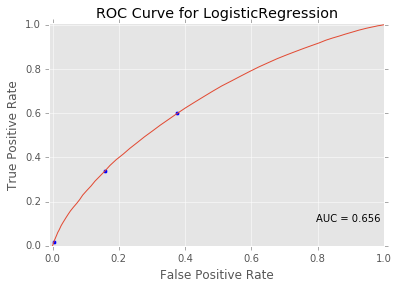

all   score: 0.605  baseline: 0.848   prec: 0.780   f1: 0.721  | test score 0.603  prec 0.782 f1 0.530  GP 6MM
2011  score: 0.628  baseline: 0.896   prec: 0.847   f1: 0.753  | test score 0.622  prec 0.847
2012  score: 0.593  baseline: 0.866   prec: 0.815   f1: 0.716  | test score 0.592  prec 0.822
2013  score: 0.618  baseline: 0.822   prec: 0.741   f1: 0.727  | test score 0.610  prec 0.750


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

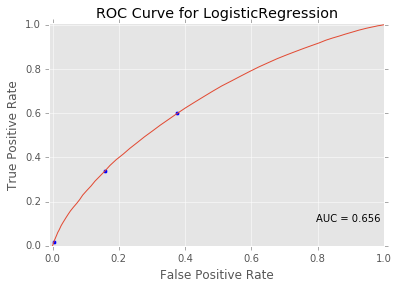

all   score: 0.605  baseline: 0.848   prec: 0.722   f1: 0.721  | test score 0.603  prec 0.733 f1 0.278  GP -497MM
2011  score: 0.628  baseline: 0.896   prec: 0.831   f1: 0.753  | test score 0.622  prec 0.814
2012  score: 0.593  baseline: 0.866   prec: 0.779   f1: 0.716  | test score 0.592  prec 0.799
2013  score: 0.618  baseline: 0.822   prec: 0.686   f1: 0.727  | test score 0.610  prec 0.701


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

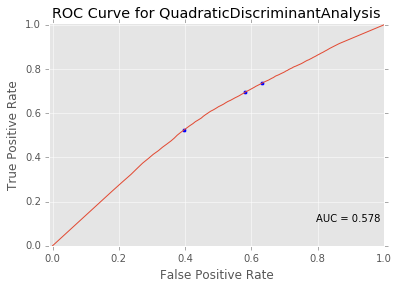

all   score: 0.684  baseline: 0.848   prec: 0.796   f1: 0.798  | test score 0.680  prec 0.801 f1 0.396  GP -347MM
2011  score: 0.586  baseline: 0.896   prec: 0.872   f1: 0.715  | test score 0.624  prec 0.873
2012  score: 0.667  baseline: 0.866   prec: 0.837   f1: 0.788  | test score 0.687  prec 0.843
2013  score: 0.674  baseline: 0.822   prec: 0.768   f1: 0.789  | test score 0.687  prec 0.771


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [27]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


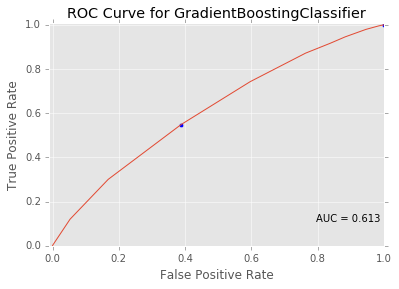

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

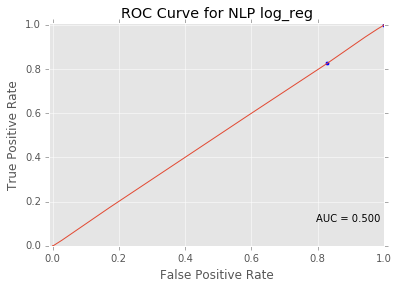

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg')

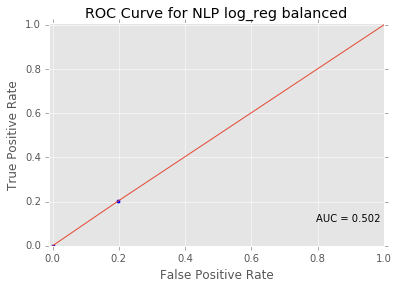

all   score: 0.296  baseline: 0.860   prec: 0.858   f1: 0.338  | test score 0.284  prec 0.862 f1 0.829  GP 198MM
2011  score: 0.628  baseline: 0.904   prec: 0.910   f1: 0.757  | test score 0.557  prec 0.875
2012  score: 0.294  baseline: 0.866   prec: 0.865   f1: 0.334  | test score 0.186  prec 0.868
2013  score: 0.511  baseline: 0.830   prec: 0.830   f1: 0.629  | test score 0.545  prec 0.838


LogisticRegression(C=1e-06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg balanced')

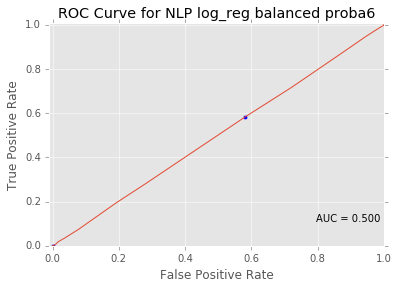

all   score: 0.565  baseline: 0.860   prec: 0.914   f1: 0.699  | test score 0.561  prec 0.826 f1 0.002  GP -230MM
2011  score: 0.478  baseline: 0.904   prec: 0.884   f1: 0.620  | test score 0.517  prec 0.921
2012  score: 0.578  baseline: 0.866   prec: 0.820   f1: 0.712  | test score 0.551  prec 0.914
2013  score: 0.527  baseline: 0.830   prec: 0.866   f1: 0.654  | test score 0.524  prec 0.759


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg balanced proba6')

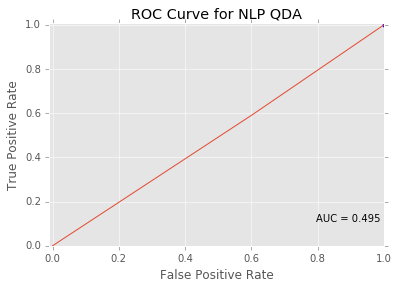

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM


C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [32]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP QDA')

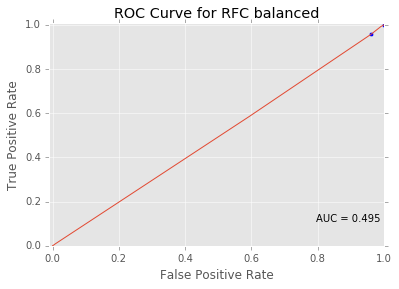

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [33]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='RFC balanced')

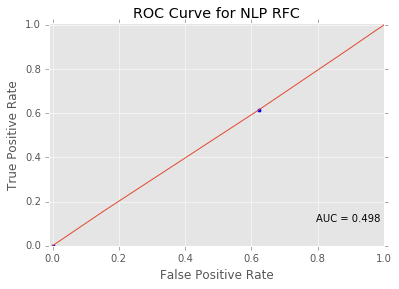

all   score: 0.582  baseline: 0.860   prec: 0.860   f1: 0.716  | test score 0.582  prec 0.865 f1 0.533  GP -24MM
2011  score: 0.555  baseline: 0.904   prec: 0.903   f1: 0.696  | test score 0.597  prec 0.885
2012  score: 0.632  baseline: 0.866   prec: 0.864   f1: 0.761  | test score 0.602  prec 0.872
2013  score: 0.534  baseline: 0.830   prec: 0.830   f1: 0.661  | test score 0.558  prec 0.838


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [34]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP RFC')

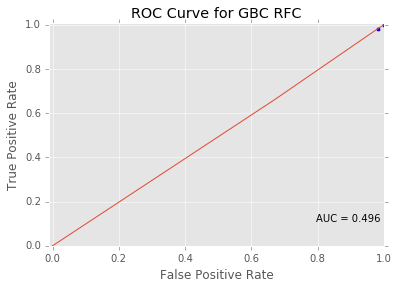

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='GBC RFC')

#### Full Document-Term Matrix (Reduced with PCA)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\core\internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  return self.values[slicer]
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\pandas\indexes\base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  result = getitem(key)


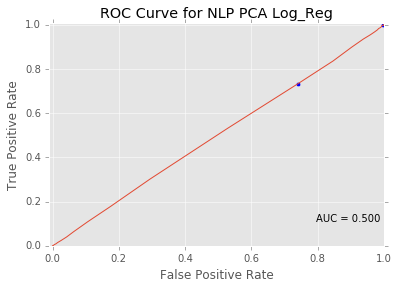

all   score: 0.860  baseline: 0.860   prec: 0.793   f1: 0.924  | test score 0.862  prec 0.857 f1 0.001  GP -236MM
2011  score: 0.900  baseline: 0.904   prec: 0.921   f1: 0.947  | test score 0.891  prec 0.875
2012  score: 0.864  baseline: 0.866   prec: 0.749   f1: 0.927  | test score 0.864  prec 0.824
2013  score: 0.830  baseline: 0.830   prec: 0.960   f1: 0.907  | test score 0.836  prec 0.750


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA Log_Reg')

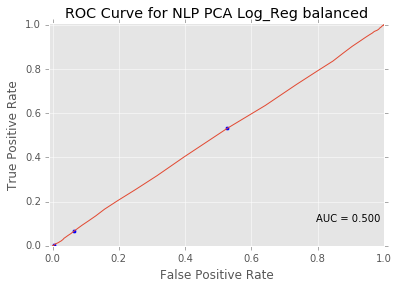

all   score: 0.524  baseline: 0.860   prec: 0.858   f1: 0.658  | test score 0.524  prec 0.861 f1 0.607  GP 20MM
2011  score: 0.590  baseline: 0.904   prec: 0.905   f1: 0.729  | test score 0.593  prec 0.910
2012  score: 0.522  baseline: 0.866   prec: 0.870   f1: 0.658  | test score 0.533  prec 0.864
2013  score: 0.530  baseline: 0.830   prec: 0.833   f1: 0.659  | test score 0.530  prec 0.840


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA Log_Reg balanced')

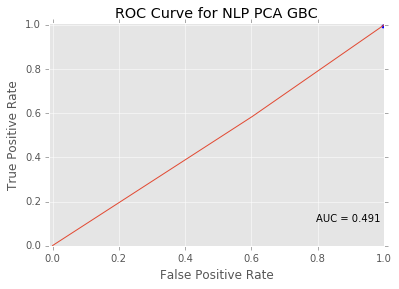

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -237MM
2011  score: 0.903  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [38]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA GBC')

## Stacking

In [39]:
class Stacking(object):
    
    def __init__(self, unfitted_combiner, component_type = 'mixed'):
        self.combiner = unfitted_combiner
        self.model_stack = None   
        
        stack = []
        
        # logistic regression component models with various class weights
        if component_type == 'log_reg':
            for diff in np.arange(0, 5, 0.5):
                weight_dict = { 0 : 1, 1 : (1 + diff) }
                stack.append([Log_Reg(C = 1, class_weight = weight_dict), 'Log_Reg ' + str(1 + diff)])
                
        # default - mixed component models
        else:
            stack.append((Log_Reg(C = 10 ** -5), 'Log_Reg'))
            stack.append((Log_Reg(C = 10 ** -5, class_weight = 'balanced'), 'Log_Reg balanced'))
            stack.append((LDA(shrinkage = 1, solver = 'eigen'), 'LDA'))
            stack.append((QDA(reg_param = 1), 'QDA'))
            stack.append((RFC(random_state=1729, n_estimators = 10, max_depth = 4), 'RF'))
            stack.append((RFC(random_state=1729, n_estimators = 300, max_depth = 5, class_weight = 'balanced'),
                        'RF balanced'))
            stack.append((GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), 'Boost'))
            stack.append((DTC(max_depth = 10, max_features = 'log2', criterion = 'gini'), 'Tree 1'))
            stack.append((DTC(max_depth = 20, max_features = 'sqrt', criterion = 'entropy'), 'Tree 2'))
            stack.append((DTC(max_depth = 20, max_features = None, criterion = 'entropy'), 'Tree 3'))
            stack.append((DTC(max_depth = 30, max_features = None, criterion = 'gini'), 'Tree 4'))      
            #stack.append(SVC(class_weight = 'balanced')) # slow
                         
        self.model_stack = pd.DataFrame(stack, columns = ['Model_Params', 'Model'])
        self.num_models = len(self.model_stack)
    
    def _predict_component_models(self, X):
        n = X.shape[0]
        y_hat_stack = np.zeros((n, self.num_models))
        for index in range(self.num_models):
            y_hat_stack[:, index] = self.model_stack.iloc[index, 0].predict(X)
        return y_hat_stack
        
    def fit(self, X, y):
        for index in range(self.num_models):
            self.model_stack.iloc[index, 0].fit(X, y)
        y_hat_stack = self._predict_component_models(X)
        self.combiner = self.combiner.fit(y_hat_stack, y)
        return self
        
    def score(self, X, y):
        y_hat_stack = self._predict_component_models(X)
        score = self.combiner.score(y_hat_stack, y)
        return score
              
    def predict(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat = self.combiner.predict(y_hat_stack)
        return y_hat
    
    def predict_proba(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat_proba = self.combiner.predict_proba(y_hat_stack)
        return y_hat_proba
    
    def confusion_matrix(self, y, y_hat):
        return confusion_matrix(y, y_hat)
     
    def f1_score(self, y, y_hat):
        return f1_score(y, y_hat, pos_label = 1)
    
    def get_features(self):
        long_name = str(type(self.combiner))
        short_name = re.sub('.*\.', '', long_name)
        short_name = re.sub('\'>', '', short_name)
        
        index = index = self.model_stack.iloc[:, 1]
        if short_name == 'LogisticRegression':
            return pd.DataFrame(self.combiner.coef_.T, index = index)
        else:
            return pd.DataFrame(self.combiner.feature_importances_.T, index = index)

In [40]:
def print_stacking_features(x_train, y_train, x_test, y_test, combiner, component_type = 'mixed'):
    model = Stacking(combiner, component_type)
    model.fit(x_train, y_train)
    
    features = model.get_features()
    features.columns = ['Importance']
    features['Abs'] = np.abs(features.Importance)
    features = features.sort_values('Abs', ascending = False).drop('Abs', axis = 1)
    display(features)

#### Regular Data

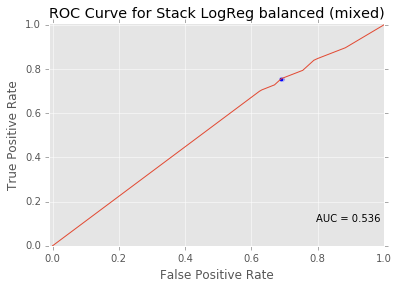

all   score: 0.693  baseline: 0.848   prec: 0.807   f1: 0.808  | test score 0.689  prec 0.815 f1 0.375  GP -382MM
2011  score: 0.814  baseline: 0.896   prec: 0.864   f1: 0.896  | test score 0.805  prec 0.867
2012  score: 0.739  baseline: 0.866   prec: 0.825   f1: 0.844  | test score 0.708  prec 0.847
2013  score: 0.683  baseline: 0.822   prec: 0.789   f1: 0.799  | test score 0.708  prec 0.773


In [41]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack LogReg balanced (mixed)")

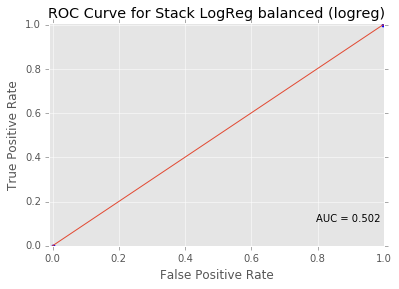

all   score: 0.848  baseline: 0.848   prec: 0.556   f1: 0.918  | test score 0.848  prec 0.564 f1 0.002  GP -913MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.600
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.750
2013  score: 0.822  baseline: 0.822   prec: 0.466   f1: 0.902  | test score 0.823  prec 0.592


In [42]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack LogReg balanced (logreg)")

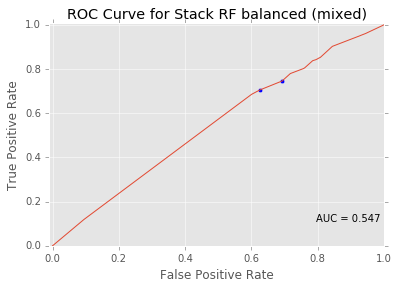

all   score: 0.687  baseline: 0.848   prec: 0.808   f1: 0.803  | test score 0.679  prec 0.822 f1 0.389  GP -368MM
2011  score: 0.803  baseline: 0.896   prec: 0.859   f1: 0.888  | test score 0.808  prec 0.858
2012  score: 0.733  baseline: 0.866   prec: 0.855   f1: 0.840  | test score 0.759  prec 0.847
2013  score: 0.685  baseline: 0.822   prec: 0.796   f1: 0.802  | test score 0.675  prec 0.791


In [43]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack RF balanced (mixed)")

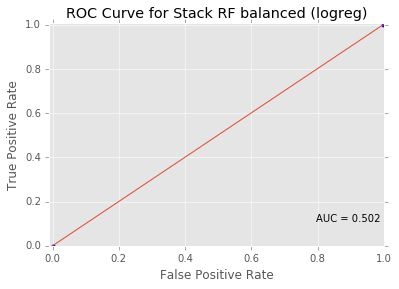

all   score: 0.706  baseline: 0.848   prec: 0.602   f1: 0.733  | test score 0.848  prec 0.564 f1 0.002  GP -913MM
2011  score: 0.586  baseline: 0.896   prec: nan   f1: 0.570  | test score 0.893  prec 0.600
2012  score: 0.578  baseline: 0.866   prec: nan   f1: 0.558  | test score 0.135  prec 0.865
2013  score: 0.822  baseline: 0.822   prec: 0.456   f1: 0.902  | test score 0.823  prec 0.592


In [44]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack RF balanced (logreg)")

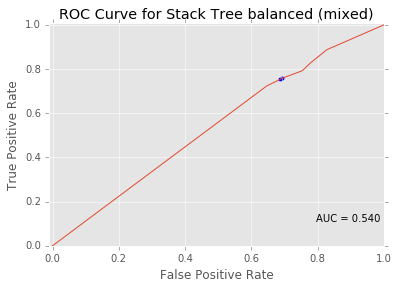

all   score: 0.690  baseline: 0.848   prec: 0.808   f1: 0.805  | test score 0.689  prec 0.815 f1 0.374  GP -383MM
2011  score: 0.801  baseline: 0.896   prec: 0.868   f1: 0.887  | test score 0.806  prec 0.867
2012  score: 0.711  baseline: 0.866   prec: 0.835   f1: 0.823  | test score 0.699  prec 0.844
2013  score: 0.671  baseline: 0.822   prec: 0.799   f1: 0.790  | test score 0.682  prec 0.786


In [45]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack Tree balanced (mixed)")

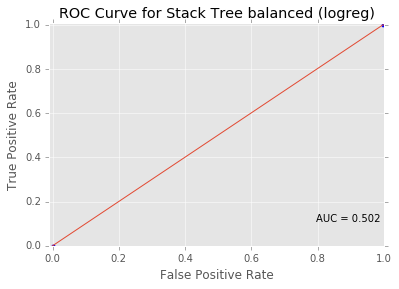

all   score: 0.848  baseline: 0.848   prec: 0.556   f1: 0.918  | test score 0.848  prec 0.564 f1 0.002  GP -913MM
2011  score: 0.895  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.600
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.750
2013  score: 0.822  baseline: 0.822   prec: 0.466   f1: 0.902  | test score 0.823  prec 0.592


In [46]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack Tree balanced (logreg)")

#### Stacking Feature Importances

In [47]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,9.228480
Tree 3,5.557207
Tree 2,3.402615
Log_Reg,-2.037796
RF,-2.037796
Boost,-2.037796
LDA,-1.990058
QDA,-1.990058
Tree 1,-1.351738


In [48]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 4,0.658585
Tree 3,0.193637
Tree 2,0.128371
RF balanced,0.010109
Log_Reg balanced,0.007899
Tree 1,0.001368
LDA,0.000022
QDA,0.000008
Log_Reg,0.000000


In [49]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

,Importance
Model,
Tree 3,0.423143
Tree 4,0.293983
Tree 2,0.282551
Log_Reg balanced,0.000116
RF balanced,0.000100
Tree 1,0.000081
QDA,0.000027
Log_Reg,0.000000
LDA,0.000000


## Visualizations

In [50]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
NLP RFC,0.497518,0.860074,0.716248,0.859688,0.582459,0.533418,0.864835,-24.230891,0.581941
NLP log_reg balanced,0.502277,0.860074,0.338355,0.857985,0.295700,0.829072,0.861926,198.950762,0.284059
NLP PCA Log_Reg balanced,0.500083,0.860074,0.657955,0.858047,0.524233,0.606677,0.861497,20.412340,0.523668
NLP PCA Log_Reg,0.500229,0.860074,0.924484,0.793333,0.859595,0.001294,0.857143,-236.575713,0.862136
NLP log_reg balanced proba6,0.499836,0.860074,0.698902,0.914265,0.564614,0.002048,0.826087,-230.231080,0.560531
Stack RF balanced (mixed),0.547295,0.847953,0.802803,0.807899,0.687319,0.388627,0.822304,-368.905140,0.679143
Stack LogReg balanced (mixed),0.536483,0.847953,0.807633,0.806766,0.693102,0.374553,0.814898,-382.527328,0.688925
Stack Tree balanced (mixed),0.540363,0.847953,0.804837,0.808346,0.689554,0.373926,0.814730,-383.391387,0.689313
QuadraticDiscriminantAnalysis,0.577950,0.847953,0.798440,0.795508,0.683805,0.396484,0.800633,-347.544435,0.680486
LogReg_CV balanced,0.656792,0.847953,0.722571,0.780541,0.606664,0.533929,0.781949,13.870466,0.600361


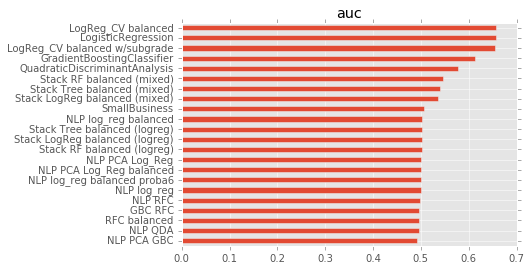

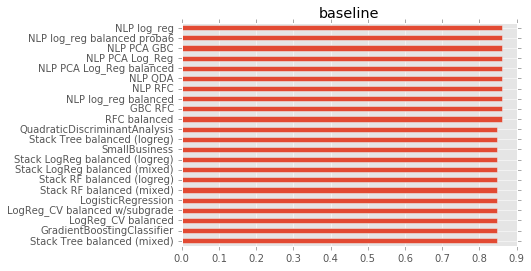

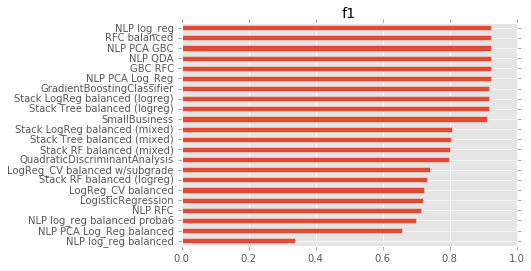

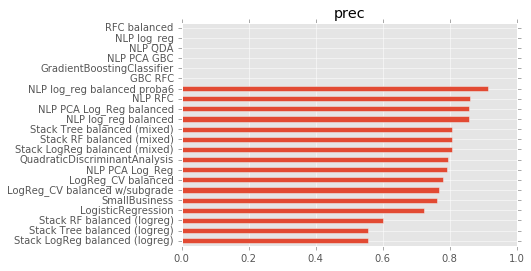

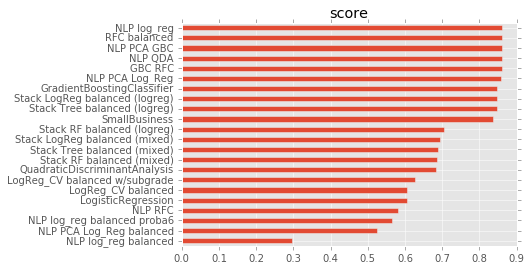

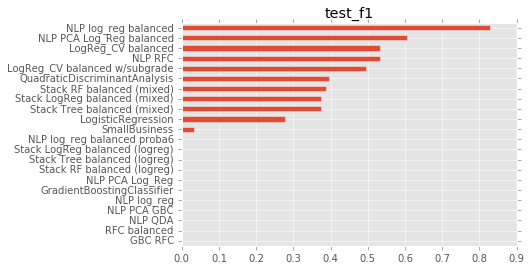

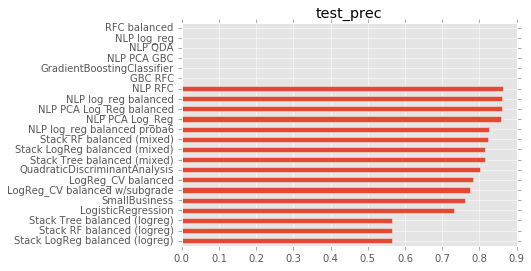

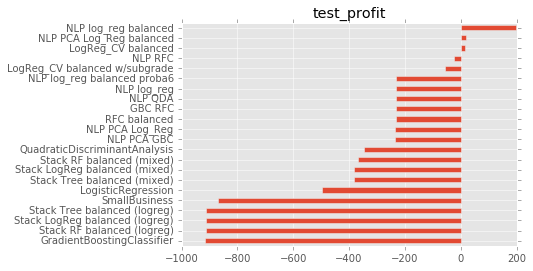

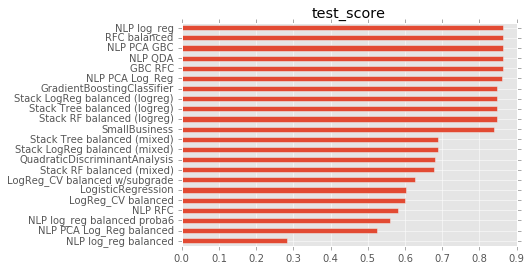

In [51]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()

### Profit

In [52]:
# calculate profits
revenues = profit_data_train.total_rec_int + profit_data_train.total_rec_prncp + \
        profit_data_train.total_rec_late_fee + profit_data_train.recoveries
costs = profit_data_train.loan_amount
profit_data_train.actual_profit = revenues - costs

(array([  4.00000000e+00,   4.00000000e+01,   5.70000000e+01,
          7.30000000e+01,   9.80000000e+01,   9.70000000e+01,
          1.18000000e+02,   1.18000000e+02,   1.26000000e+02,
          1.52000000e+02,   1.69000000e+02,   1.72000000e+02,
          1.64000000e+02,   1.81000000e+02,   1.72000000e+02,
          1.74000000e+02,   1.41000000e+02,   1.63000000e+02,
          2.22000000e+02,   1.78000000e+02,   1.69000000e+02,
          1.90000000e+02,   1.83000000e+02,   1.61000000e+02,
          1.50000000e+02,   1.32000000e+02,   1.07000000e+02,
          9.10000000e+01,   7.70000000e+01,   9.50000000e+01,
          6.30000000e+01,   6.50000000e+01,   6.20000000e+01,
          2.80000000e+01,   3.70000000e+01,   1.70000000e+01,
          2.00000000e+01,   1.10000000e+01,   2.39040000e+04,
          1.00000000e+00]),
 array([ 0.        ,  0.02612489,  0.05224978,  0.07837468,  0.10449957,
         0.13062446,  0.15674935,  0.18287425,  0.20899914,  0.23512403,
         0.26124892,

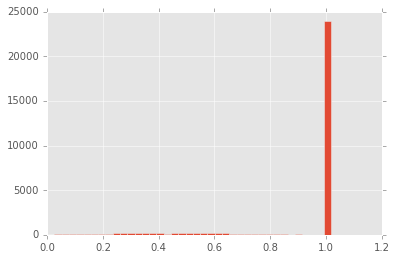

In [53]:
profit_ratio = np.where(y, 1.0, revenues / (profit_data_train.installment * 36))
plt.hist(profit_ratio, bins=40)

In [54]:
from sklearn.linear_model import RidgeCV
np.random.seed(1729)
train_flags_ridge = np.random.random(len(x_expanded)) < 0.7

ridge_profit = RidgeCV().fit(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Alpha:", ridge_profit.alpha_
print "Train R^2:", ridge_profit.score(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Test R^2:", ridge_profit.score(x_expanded.iloc[~train_flags_ridge, :], profit_ratio[~train_flags_ridge])

Alpha: 10.0
Train R^2: 0.0490559333143
Test R^2: 0.0358260285386


In [55]:
# print summary revenue and cost
print "REVENUES"
print "Total interested received =", profit_data.total_rec_int.sum() / float(10 ** 6)
print "Total principal received =", profit_data.total_rec_prncp.sum() / float(10 ** 6)
print "Total late fees received =", profit_data.total_rec_late_fee.sum() / float(10 ** 6)
print "Recoveries =", profit_data.recoveries.sum() / float(10 ** 6)
print
print "COSTS"
print "Total loan amounts =", profit_data.loan_amount.sum() / float(10 ** 6)

REVENUES
Total interested received = 204.88315865
Total principal received = 1216.20363347
Total late fees received = 0.0743948083222
Recoveries = 11.84101203

COSTS
Total loan amounts = 1342.7455


In [56]:
### fit and score for profits

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Lin_Reg().fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "R-squared on local test set =", local_test_score

R-squared on local test set = 0.0343959206713


In [57]:
### fit and score for classification

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Log_Reg(class_weight = 'balanced').fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "Accuracy on local test set =", local_test_score
local_test_y_hat = model.predict(local_x_test)
local_test_precision = local_y_test[local_test_y_hat].mean()
print "Precision on local test set =", local_test_precision

Accuracy on local test set = 0.61966271977
Precision on local test set = 0.91033776868


In [58]:
### fit and predict for classification

model2 = Log_Reg(class_weight = 'balanced').fit(x_expanded_pca, y)
y_predict_train = pd.DataFrame(model2.predict(x_expanded_pca))
y_predict_test = pd.DataFrame(model2.predict(x_test_expanded_pca))

y_predict_train.index = x_expanded_pca.index
y_predict_test.index = x_test_expanded_pca.index

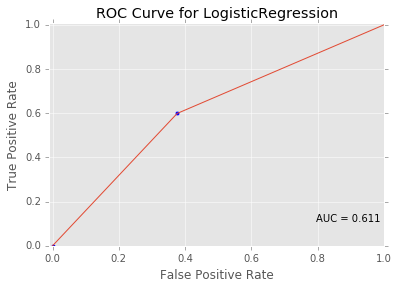

all   score: 0.612  baseline: 0.848   prec: 0.774   f1: 0.726  | test score 0.603  prec 0.782 f1 0.530  GP 6MM
2011  score: 0.786  baseline: 0.896   prec: 0.797   f1: 0.875  | test score 0.774  prec 0.804
2012  score: 0.659  baseline: 0.866   prec: 0.799   f1: 0.776  | test score 0.655  prec 0.806
2013  score: 0.531  baseline: 0.822   prec: 0.760   f1: 0.628  | test score 0.519  prec 0.769


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

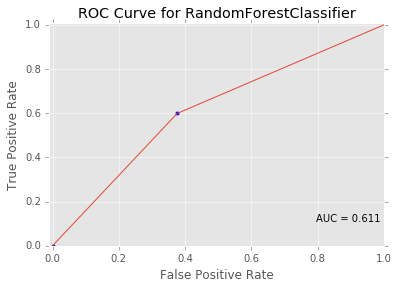

all   score: 0.612  baseline: 0.848   prec: 0.774   f1: 0.726  | test score 0.603  prec 0.782 f1 0.530  GP 6MM
2011  score: 0.786  baseline: 0.896   prec: 0.797   f1: 0.875  | test score 0.774  prec 0.804
2012  score: 0.659  baseline: 0.866   prec: 0.799   f1: 0.776  | test score 0.655  prec 0.806
2013  score: 0.531  baseline: 0.822   prec: 0.760   f1: 0.628  | test score 0.519  prec 0.769


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
eval_model_by_year(lambda: RFC(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

# Regression modeling for payback ratio

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

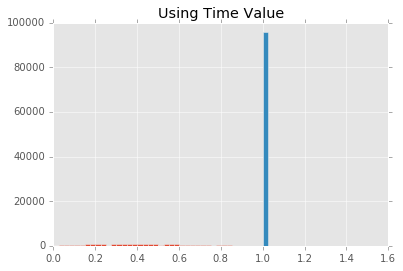

In [61]:
returns = data_filtered[['loan_status', 'loan_amount', 'installment',
                         'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 
                     ]]
returns['expected_payment'] = returns.installment * 36
returns['total_paid'] = returns.total_rec_int + returns.total_rec_late_fee + returns.total_rec_prncp
returns['ratio'] = np.where(returns.loan_status,
                            1.0,
                            returns['total_paid'] / returns['expected_payment'])
# Plot distribution
returns.groupby(returns.loan_status).ratio.hist(bins=40)
plt.title("Using Time Value")
plt.show()

In [62]:
returns_train = returns.ratio[sample_flags]
returns_test = returns.ratio[~sample_flags]

In [63]:
linear_returns_model = RidgeCV().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

0.0368581635587


In [64]:
lin_predict = linear_returns_model.predict(x_test_expanded)
for p in np.arange(0.7, 1.2, 0.1):
    yhat_lin = lin_predict >= p
    print p, ';  F1=', f1_score(y_test, yhat_lin, pos_label=1), ';  prec=',y_test[yhat_lin].mean()
    print confusion_matrix(y_test, yhat_lin)

0.7 ;  F1= 0.9179562714 ;  prec= 0.848394130473
[[    5 12863]
 [    4 71982]]
0.8 ;  F1= 0.915201953665 ;  prec= 0.851540917734
[[  454 12414]
 [  781 71205]]
0.9 ;  F1= 0.731498973306 ;  prec= 0.894823567237
[[ 7634  5234]
 [27456 44530]]
1.0 ;  F1= 0.0659502823949 ;  prec= 0.962035225049
[[12771    97]
 [69528  2458]]
1.1 ;  F1= 0.000166685187243 ;  prec= 1.0
[[12868     0]
 [71980     6]]


In [65]:
class PredictWrapper():
    def __init__(self, m):
        self.m = m
    def predict_proba(self, X):
        p = self.m.predict(X)
        return np.hstack((p, (1-p))).reshape(len(p), 2)

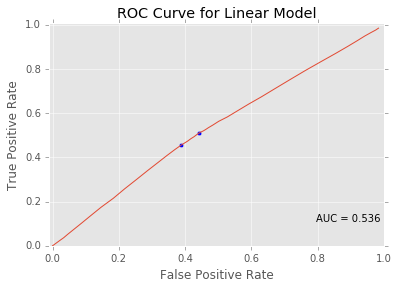

0.53603821695599452

In [66]:
ROC_plot(PredictWrapper(linear_returns_model), x_test_expanded, y_test, "Linear Model")

In [67]:
linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

-0.00856421808972


In [68]:
from sklearn.linear_model import LassoCV
np.random.seed(1729)
linear_returns_model = LassoCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


0.0314042313721


In [69]:
linear_returns_model = Lin_Reg().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

0.0354628967373


In [70]:
for p in range(2,10):
    linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, p), returns_train)
    print p, linear_returns_model.score(cross_terms(x_test_expanded, p), returns_test)

2 0.00567664911305
3 -0.00856421808972
4 -0.188253571202
5 -76356542481.0
6 -4.47683805241e+14
7 -3.05146896581e+23
8 -8.28129367026e+31
9 -7.64662487529e+39


## Just for comparison, how does loan_subgrade do?

In [71]:
x_with_subgrade = x_expanded.copy()
x_with_subgrade['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade.index]
x_with_subgrade_test = x_test_expanded.copy()
x_with_subgrade_test['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade_test.index]

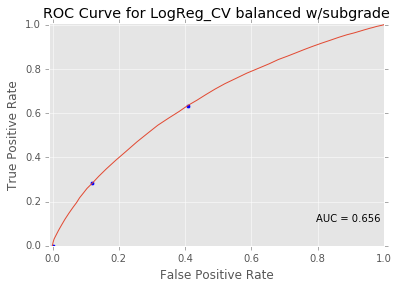

all   score: 0.628  baseline: 0.848   prec: 0.767   f1: 0.741  | test score 0.628  prec 0.775 f1 0.497  GP -56MM
C= 0.0001


In [72]:
# Compare log reg cv balanced with subgrade as an available predictor
logregcv_model_with_subgrade = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                                    model_name='LogReg_CV balanced w/subgrade',
                                                    x = x_with_subgrade,
                                                    x_test = x_with_subgrade_test
                                                 )

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model_with_subgrade.C_[0]

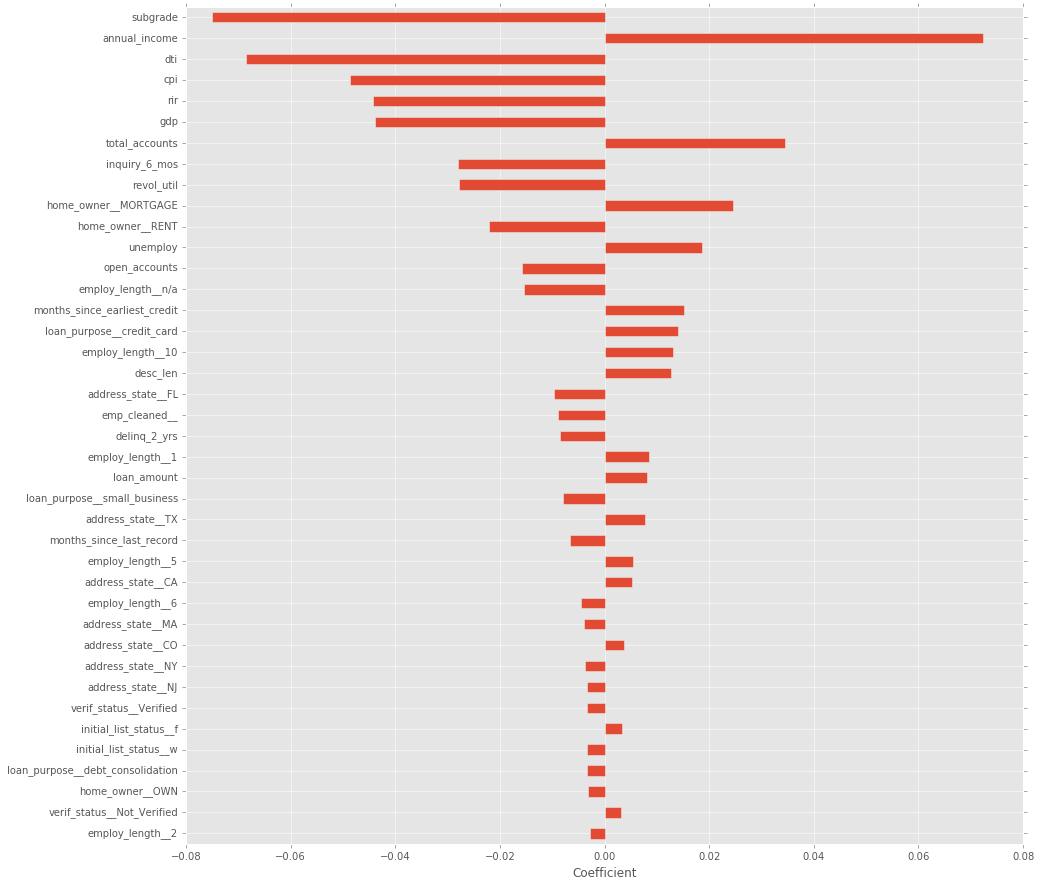

subgrade                               -0.074994
annual_income                           0.072389
dti                                    -0.068581
cpi                                    -0.048634
rir                                    -0.044275
gdp                                    -0.043893
total_accounts                          0.034487
inquiry_6_mos                          -0.028044
revol_util                             -0.027850
home_owner__MORTGAGE                    0.024583
home_owner__RENT                       -0.022062
unemploy                                0.018675
open_accounts                          -0.015792
employ_length__n/a                     -0.015381
months_since_earliest_credit            0.015125
loan_purpose__credit_card               0.014106
employ_length__10                       0.013164
desc_len                                0.012624
address_state__FL                      -0.009716
emp_cleaned__                          -0.008856
delinq_2_yrs        

In [73]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model_with_subgrade.coef_.T, index=x_with_subgrade.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
plt.figure(figsize=(15,15))
lr_coeff.sort_values('abs', ascending=False).coeff[0:40][::-1].plot(kind='barh')
plt.xlabel('Coefficient')
plt.show()
lr_coeff.sort_values('abs', ascending=False).coeff